<a href="https://colab.research.google.com/github/normandipalo/slowfast_network/blob/master/slowfast_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementation of SlowFast Network.
Be sure to use the **GPU mode** in Colab, otherwise a bug will occur in the final steps.

Author: Norman Di Palo

In [0]:
!pip install pytube
!pip install opencv-python

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pytube import YouTube
import os
import cv2

In [0]:
#Implement the various residual blocks.

def res_slow1(x, stride = False):
  if not stride:
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 64, activation="relu",data_format="channels_first")(x)
  else: 
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,1), strides = (2,2,1), padding="same",filters = 64, activation="relu",data_format="channels_first")(x)
  c1 = tf.keras.layers.BatchNormalization()(c1)
  c2 = tf.keras.layers.Conv3D(kernel_size = (3,3,1), padding="same",filters = 64, activation="relu",data_format="channels_first")(c1)
  c3 = tf.keras.layers.Conv3D(kernel_size = (1,1,1) ,padding="same", filters = 256, activation="relu",data_format="channels_first")(c2)
  if not stride:
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 256, activation="relu",data_format="channels_first")(x)
  else: 
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), strides = (2,2,1), padding="same",filters = 256, activation="relu",data_format="channels_first")(x)
  return tf.keras.layers.Add()([c3,x] )

def res_fast1(x, stride = False):
  if not stride:
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,3), padding="same",filters = 8, activation="relu",data_format="channels_first")(x)
  else: 
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,3), strides = (2,2,1), padding="same",filters = 8, activation="relu",data_format="channels_first")(x)
  c1 = tf.keras.layers.BatchNormalization()(c1)
  c2 = tf.keras.layers.Conv3D(kernel_size = (3,3,1), padding="same",filters = 8, activation="relu",data_format="channels_first")(c1)
  c3 = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 32, activation="relu",data_format="channels_first")(c2)
  if not stride:
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 32, activation="relu",data_format="channels_first")(x)
  else: 
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), strides = (2,2,1), padding="same",filters = 32, activation="relu",data_format="channels_first")(x)
  return tf.keras.layers.Add()([c3,x] )


def res_slow2(x, stride = False):
  if not stride:
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 128, activation="relu",data_format="channels_first")(x)
  else: 
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,1), strides = (2,2,1), padding="same",filters = 128,activation="relu", data_format="channels_first")(x)
  c1 = tf.keras.layers.BatchNormalization()(c1)
  c2 = tf.keras.layers.Conv3D(kernel_size = (3,3,1), padding="same",filters = 128, activation="relu",data_format="channels_first")(c1)
  c3 = tf.keras.layers.Conv3D(kernel_size = (1,1,1) ,padding="same", filters = 512,activation="relu", data_format="channels_first")(c2)
  if not stride:
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 512, activation="relu",data_format="channels_first")(x)
  else: 
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), strides = (2,2,1), padding="same",filters = 512, activation="relu",data_format="channels_first")(x)
  return tf.keras.layers.Add()([c3,x] )

def res_fast2(x, stride = False):
  if not stride:
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,3), padding="same",filters = 16, activation="relu",data_format="channels_first")(x)
  else: 
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,3), strides = (2,2,1), padding="same",filters = 16, activation="relu",data_format="channels_first")(x)
  c1 = tf.keras.layers.BatchNormalization()(c1)
  c2 = tf.keras.layers.Conv3D(kernel_size = (3,3,1), padding="same",filters = 16, activation="relu",data_format="channels_first")(c1)
  c3 = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 64, activation="relu",data_format="channels_first")(c2)
  if not stride:
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 64,activation="relu", data_format="channels_first")(x)
  else: 
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), strides = (2,2,1), padding="same",filters = 64, activation="relu",data_format="channels_first")(x)
  return tf.keras.layers.Add()([c3,x] )

def res_slow3(x, stride = False):
  if not stride:
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,3), padding="same",filters = 256, activation="relu",data_format="channels_first")(x)
  else: 
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,3), strides = (2,2,1), padding="same",filters = 256,activation="relu", data_format="channels_first")(x)
  c1 = tf.keras.layers.BatchNormalization()(c1)
  c2 = tf.keras.layers.Conv3D(kernel_size = (3,3,1), padding="same",filters = 256, activation="relu",data_format="channels_first")(c1)
  c3 = tf.keras.layers.Conv3D(kernel_size = (1,1,1) ,padding="same", filters = 1024, activation="relu",data_format="channels_first")(c2)
  if not stride:
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 1024, activation="relu",data_format="channels_first")(x)
  else: 
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), strides = (2,2,1), padding="same",filters = 1024,activation="relu", data_format="channels_first")(x)
  return tf.keras.layers.Add()([c3,x] )

def res_fast3(x, stride = False):
  if not stride:
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,3), padding="same",filters = 32, activation="relu",data_format="channels_first")(x)
  else: 
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,3), strides = (2,2,1), padding="same",filters = 32, activation="relu",data_format="channels_first")(x)
  c1 = tf.keras.layers.BatchNormalization()(c1)
  c2 = tf.keras.layers.Conv3D(kernel_size = (3,3,1), padding="same",filters = 32, activation="relu",data_format="channels_first")(c1)
  c3 = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 128, activation="relu",data_format="channels_first")(c2)
  if not stride:
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 128,activation="relu", data_format="channels_first")(x)
  else: 
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), strides = (2,2,1), padding="same",filters = 128,activation="relu", data_format="channels_first")(x)
  return tf.keras.layers.Add()([c3,x] )
  
def res_slow4(x, stride = False):
  if not stride:
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,3), padding="same",filters = 512,activation="relu", data_format="channels_first")(x)
  else: 
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,3), strides = (2,2,1), padding="same",filters = 512,activation="relu", data_format="channels_first")(x)
  c1 = tf.keras.layers.BatchNormalization()(c1)
  c2 = tf.keras.layers.Conv3D(kernel_size = (3,3,1), padding="same",filters = 512,activation="relu", data_format="channels_first")(c1)
  c3 = tf.keras.layers.Conv3D(kernel_size = (1,1,1) ,padding="same", filters = 2048, activation="relu",data_format="channels_first")(c2)
  if not stride:
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 2048,activation="relu", data_format="channels_first")(x)
  else: 
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), strides = (2,2,1), padding="same",filters = 2048,activation="relu", data_format="channels_first")(x)
  return tf.keras.layers.Add()([c3,x] )

def res_fast4(x, stride = False):
  if not stride:
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,3), padding="same",filters = 64, activation="relu",data_format="channels_first")(x)
  else: 
    c1 = tf.keras.layers.Conv3D(kernel_size = (1,1,3), strides = (2,2,1), padding="same",filters = 64,activation="relu", data_format="channels_first")(x)
  c1 = tf.keras.layers.BatchNormalization()(c1)
  c2 = tf.keras.layers.Conv3D(kernel_size = (3,3,1), padding="same",filters = 64,activation="relu", data_format="channels_first")(c1)
  c3 = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 256,activation="relu", data_format="channels_first")(c2)
  if not stride:
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), padding="same",filters = 256, activation="relu",data_format="channels_first")(x)
  else: 
    x = tf.keras.layers.Conv3D(kernel_size = (1,1,1), strides = (2,2,1), padding="same",filters = 256, activation="relu",data_format="channels_first")(x)
  return tf.keras.layers.Add()([c3,x])


In [0]:
inp_slow = tf.keras.layers.Input(shape = (3, 224, 224, 4))
inp_fast = tf.keras.layers.Input(shape = (3, 224, 224, 32))

conv_slow1 = tf.keras.layers.Conv3D(kernel_size=(7,7,1), strides=(2,2,1), filters=64, activation="relu",data_format="channels_first")
conv_fast1 = tf.keras.layers.Conv3D(kernel_size=(7,7,5), strides=(2,2,1), filters=8, activation="relu",data_format="channels_first")

pool_slow = tf.keras.layers.MaxPool3D(pool_size=(3,3,1), strides=(2,2,1), data_format="channels_first")
pool_fast = tf.keras.layers.MaxPool3D(pool_size=(3,3,1), strides=(2,2,1), data_format="channels_first")


x_s = conv_slow1(inp_slow)
x_f = conv_fast1(inp_fast)

x_s = pool_slow(x_s)
x_f = pool_fast(x_f)



#Implement the lateral transformations, in order to have the same temporal size.
lateral1 = tf.keras.layers.Conv3D(kernel_size = (1,1,5), padding = "same", strides = (1,1,7), activation="relu",filters = 16, data_format = "channels_first")
lateral2 = tf.keras.layers.Conv3D(kernel_size = (1,1,5), padding = "same", strides = (1,1,7), activation="relu",filters = 64, data_format = "channels_first")
lateral3 = tf.keras.layers.Conv3D(kernel_size = (1,1,5), padding = "same", strides = (1,1,7), activation="relu",filters = 128, data_format = "channels_first")
lateral4 = tf.keras.layers.Conv3D(kernel_size = (1,1,5), padding = "same", strides = (1,1,7), activation="relu",filters = 256, data_format = "channels_first")


x_f_l = lateral1(x_f)
x_s = tf.keras.layers.concatenate([x_s, x_f_l], axis = 1)
for i in range(3):
  #First three res blocks.
  x_s = res_slow1(x_s)
  x_f = res_fast1(x_f)
  
x_f_l = lateral2(x_f)
x_s = tf.keras.layers.concatenate([x_s, x_f_l], axis = 1)
#One res block with stride + 3 with no stride
x_s = res_slow2(x_s, True)
x_f = res_fast2(x_f, True)

for i in range(3):
  x_s = res_slow2(x_s)
  x_f = res_fast2(x_f)
  

x_f_l = lateral3(x_f)
x_s = tf.keras.layers.concatenate([x_s, x_f_l], axis = 1)
#One res block with stride + 5 with no stride

x_s = res_slow3(x_s, True)
x_f = res_fast3(x_f, True)

for i in range(5):
  x_s = res_slow3(x_s)
  x_f = res_fast3(x_f)


x_f_l = lateral4(x_f)
x_s = tf.keras.layers.concatenate([x_s, x_f_l], axis = 1)
#One res block with stride + 2 with no stride

x_s = res_slow4(x_s, True)
x_f = res_fast4(x_f, True)

for i in range(2):
  x_s = res_slow4(x_s)
  x_f = res_fast4(x_f)
  

x_s = tf.keras.layers.GlobalAveragePooling3D(data_format="channels_first")(x_s)
x_f = tf.keras.layers.GlobalAveragePooling3D(data_format="channels_first")(x_f)

out = tf.keras.layers.concatenate([x_s, x_f])

out = tf.keras.layers.Dense(units = 40, activation="softmax")(out)

model = tf.keras.models.Model(inputs = [inp_slow, inp_fast], outputs = [out])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 3, 224, 224,  0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 3, 224, 224,  0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 8, 109, 109,  5888        input_2[0][0]                    
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 64, 109, 109, 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_poolin

In [0]:
#Download a random video to do a test.
YouTube("https://www.youtube.com/watch?v=Nnr1cBP4mWs").streams.first().download(os.getcwd())

'/content/네이버 클로바 프렌즈 (Naver Clova Friends).mp4'

In [0]:
!ls

'네이버 클로바 프렌즈 (Naver Clova Friends).mp4'   sample_data


In [0]:
#Open video and get fps.
vidcap = cv2.VideoCapture("/content/네이버 클로바 프렌즈 (Naver Clova Friends).mp4")
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
print(fps)

24


In [0]:
# We need to take 32 frames from the first 2 secs, i.e. 32 frames out of 48. This
# computes which frames we need to take for the fast channel.
fast_frames_idx = np.arange(0,48,48/32, dtype = np.int32)

# We need to take 4 frames from the first 2 secs, i.e. 32 frames out of 48. This
# computes which frames we need to take for the slow channel.
slow_frames_idx = np.arange(0,48,48/4, dtype = np.int32)
print(fast_frames_idx, slow_frames_idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] [ 0 12 24 36]


In [0]:
fast_frames = np.zeros((3,224,224,32), dtype = np.uint8)
slow_frames = np.zeros((3,224,224,4), dtype = np.uint8)
f_id = 0
s_id = 0
for i in range(48):
  #Get next frame from video, resize it and put channels first.
  success, next_frame = vidcap.read()
  
  if not success: break
  next_frame = cv2.resize(next_frame, (224,224))
  next_frame = cv2.cvtColor(next_frame, cv2.COLOR_BGR2RGB)
  next_frame = np.transpose(next_frame, axes = [2,0,1])

  if i in fast_frames_idx:
    fast_frames[:,:,:,f_id] = next_frame.copy()
    f_id+=1
  if i in slow_frames_idx:
    slow_frames[:,:,:,s_id] = next_frame.copy()
    s_id+=1
  

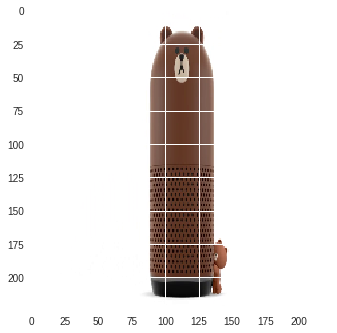

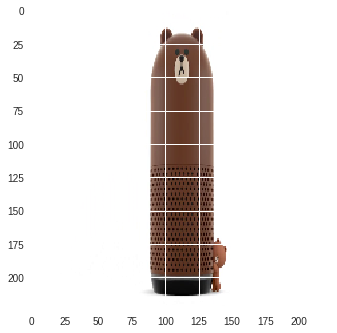

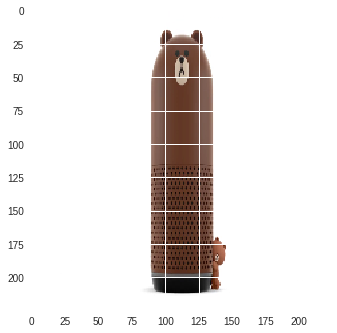

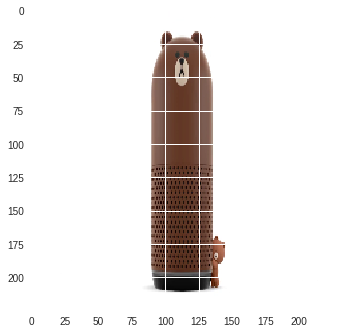

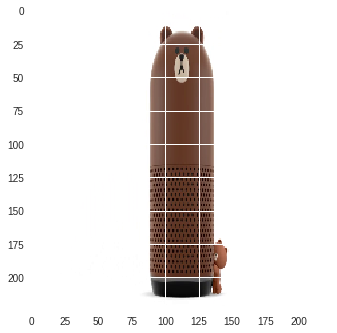

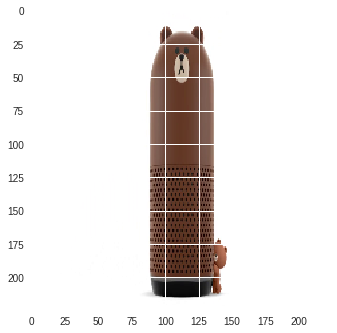

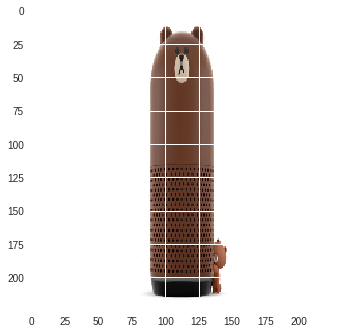

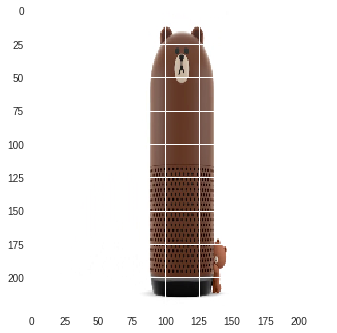

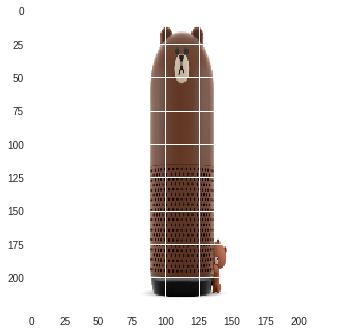

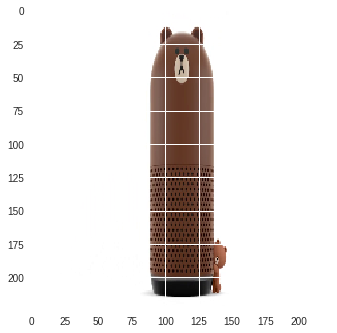

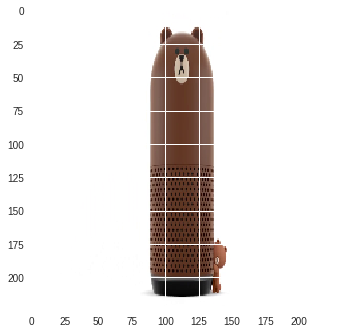

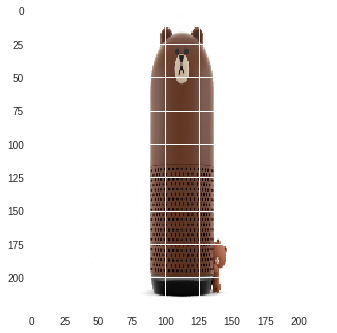

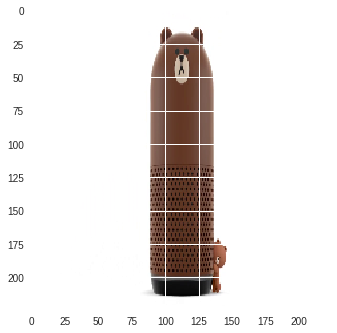

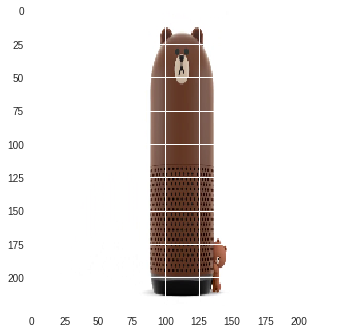

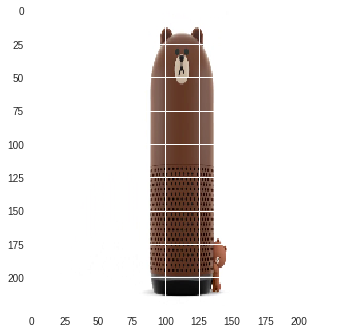

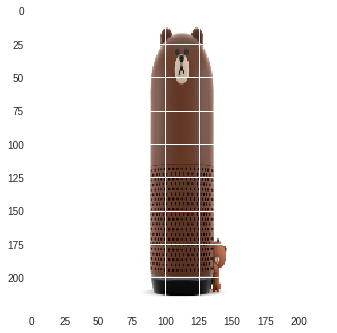

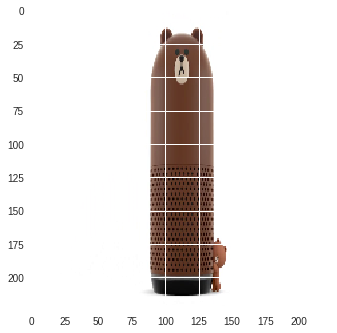

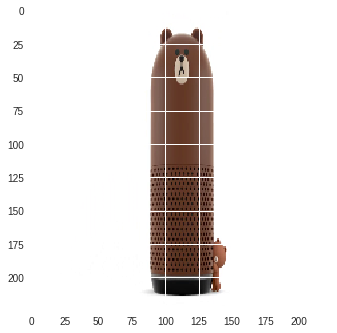

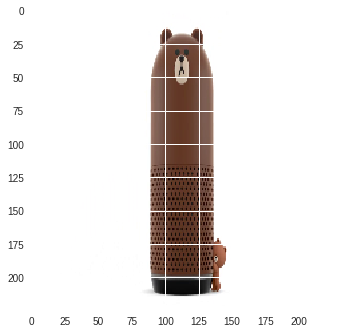

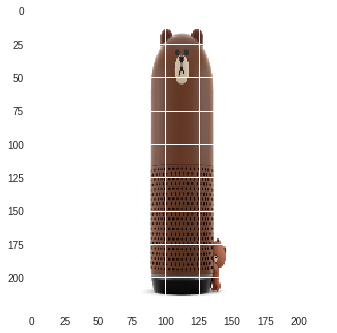

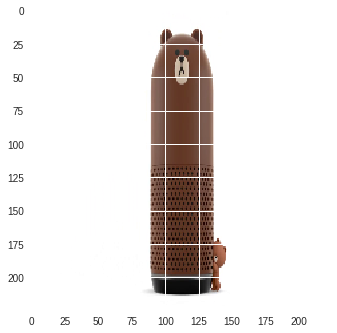

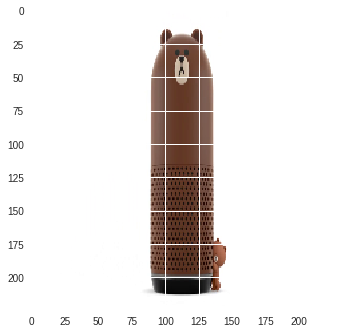

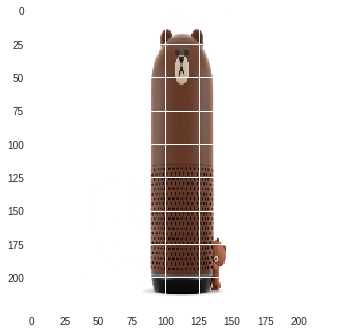

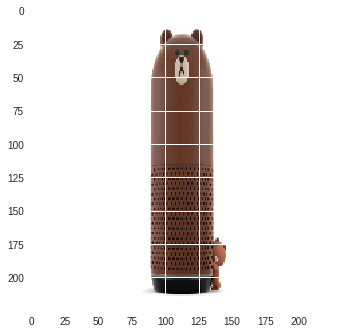

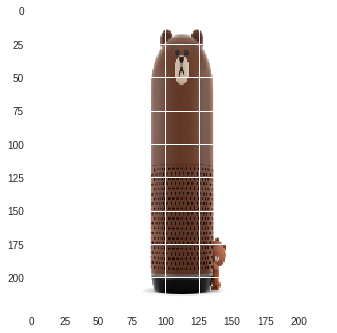

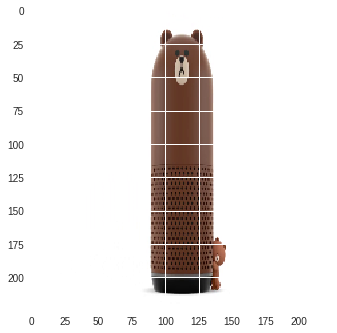

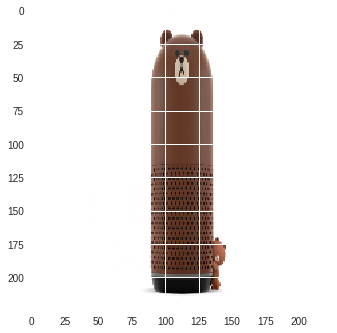

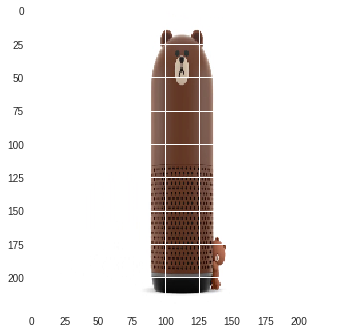

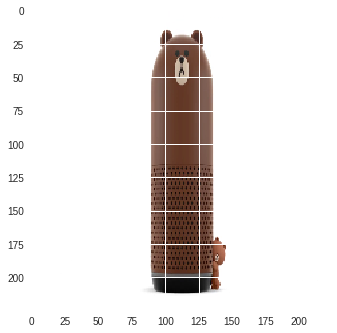

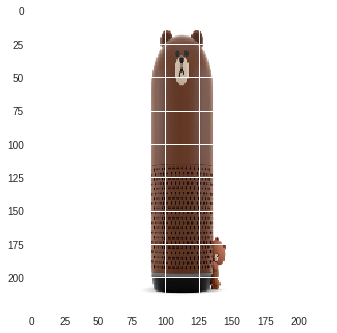

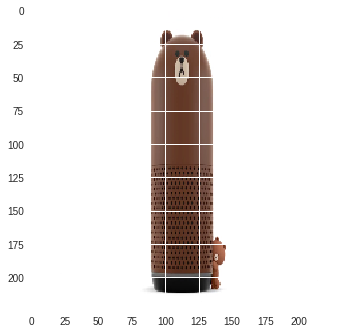

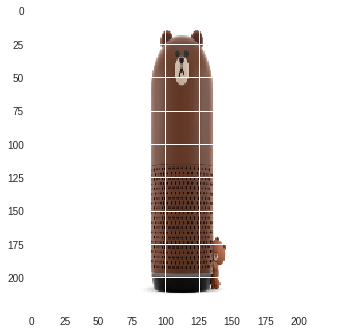

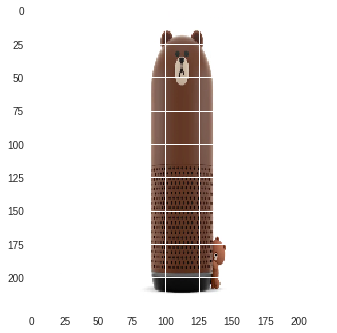

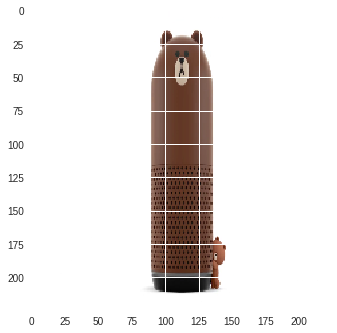

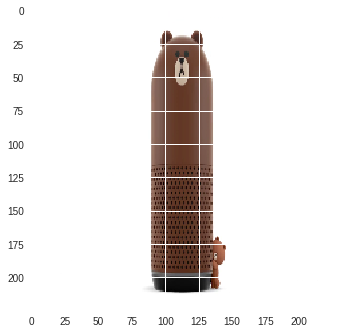

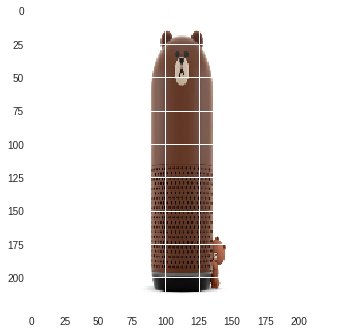

In [0]:
#Let's check the slow and fast frames taken.
for i in range(4):
  plt.imshow(np.transpose(slow_frames[:,:,:,i], axes = [1,2,0]))
  plt.show()
  
for i in range(32):
  plt.imshow(np.transpose(fast_frames[:,:,:,i], axes = [1,2,0]))
  plt.show()

In [0]:
#Get a prediction, in order to see if the model works.
model.predict([np.asarray(slow_frames[None,:,:,:,:], dtype = np.float32), np.asarray(fast_frames[None,:,:,:,:], dtype = np.float32)])

array([[4.65589389e-02, 4.74993745e-03, 1.87440703e-04, 1.78821664e-03,
        7.33283814e-05, 2.72627221e-05, 1.45463841e-02, 5.01189567e-03,
        5.54806786e-03, 6.35912584e-04, 2.29927115e-04, 8.30938865e-04,
        9.89288650e-03, 2.04401501e-02, 1.10407804e-04, 1.99325895e-03,
        2.55144056e-04, 5.21910749e-02, 5.94215514e-03, 1.48603471e-03,
        3.19236680e-03, 6.78463001e-03, 2.12042232e-05, 6.32270128e-02,
        2.50530057e-03, 1.12455152e-02, 2.31765280e-03, 1.24921920e-02,
        1.96831650e-04, 1.23901200e-03, 6.75362766e-01, 3.41231847e-04,
        2.65999394e-03, 1.41913863e-02, 5.42964553e-03, 3.90850939e-03,
        3.94391920e-03, 5.43931872e-03, 6.89579465e-05, 1.29332105e-02]],
      dtype=float32)